In [237]:
import yfinance as yf

df = yf.download('SPY')
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open   Volume
Ticker            SPY        SPY        SPY        SPY      SPY
Date                                                           
1993-01-29  24.452526  24.469918  24.348177  24.469918  1003200
1993-02-01  24.626431  24.626431  24.469907  24.469907   480500
1993-02-02  24.678614  24.696005  24.556873  24.609047   201300
1993-02-03  24.939468  24.956860  24.695987  24.713378   529400
1993-02-04  25.043831  25.096006  24.748175  25.026439   531500


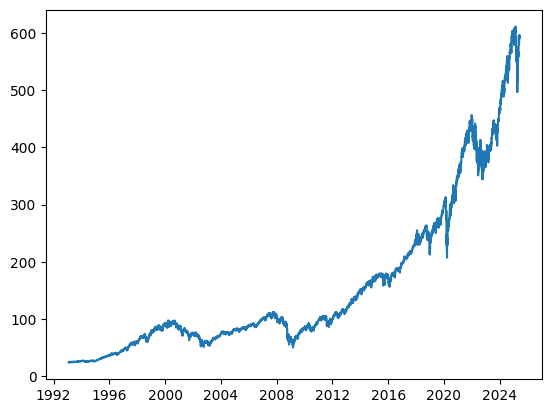

In [238]:
import matplotlib.pyplot as plt

plt.plot(df['Close'])

In [239]:
df['MovingAvg'] = df['Close'].rolling(50).mean()
df

Price,Close,High,Low,Open,Volume,MovingAvg
Ticker,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,
1993-01-29,24.452526,24.469918,24.348177,24.469918,1003200,NaN
1993-02-01,24.626431,24.626431,24.469907,24.469907,480500,NaN
1993-02-02,24.678614,24.696005,24.556873,24.609047,201300,NaN
1993-02-03,24.939468,24.956860,24.695987,24.713378,529400,NaN
1993-02-04,25.043831,25.096006,24.748175,25.026439,531500,NaN
...,...,...,...,...,...,...
2025-05-30,589.390015,591.130005,583.239990,588.929993,90601200,558.742881
2025-06-02,592.710022,592.789978,585.059998,587.760010,61630500,559.321201


[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'SPY Close Vs. Moving Average')

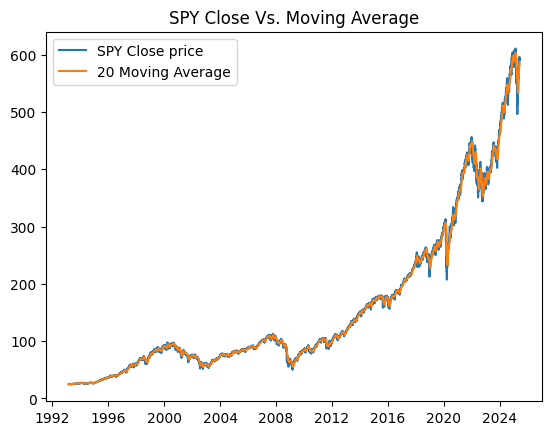

In [240]:
df = yf.download(TICKER)
df['MovingAvg'] = df['Close'].rolling(WINDOW).mean()

# df.iloc[-100:, :] # last 100 rows
df = df.dropna()

plt.plot(df['Close'])
plt.plot(df['MovingAvg'])
plt.legend([f'{TICKER} Close price', f'{WINDOW} Moving Average'])
plt.title(f'{TICKER} Close Vs. Moving Average')

In [241]:
import numpy as np

df.columns = df.columns.get_level_values(0)

def add_ma_strategy(df):

    df['Strategy'] = np.where(df['Close'] > df['MovingAvg'], 1, -1)
    return df

df = add_ma_strategy(df)
df['asset_cumulative'] = np.cumprod(1 + df['Close'].pct_change()) -1
df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy'].shift()) -1

df

Price,Close,High,Low,Open,Volume,MovingAvg,Strategy,asset_cumulative,strategy_cumulative
Date,,,,,,,,,
1993-02-26,24.713379,24.730770,24.591638,24.730770,66200,24.639480,1,NaN,NaN
1993-03-01,24.643827,24.800351,24.609044,24.800351,66500,24.649044,-1,-0.002814,-0.002814
1993-03-02,25.009039,25.009039,24.626425,24.661208,182400,24.668175,1,0.011964,-0.017592
1993-03-03,25.113380,25.130772,25.009031,25.043814,280100,24.689913,1,0.016186,-0.013493
1993-03-04,24.974283,25.148199,24.974283,25.148199,89500,24.691652,1,0.010557,-0.018957
...,...,...,...,...,...,...,...,...,...
2025-05-30,589.390015,591.130005,583.239990,588.929993,90601200,580.639005,1,22.849026,-0.733768
2025-06-02,592.710022,592.789978,585.059998,587.760010,61630500,581.936505,1,22.983366,-0.732269
2025-06-03,596.090027,597.080017,591.849976,592.340027,63606200,583.565506,1,23.120135,-0.730742


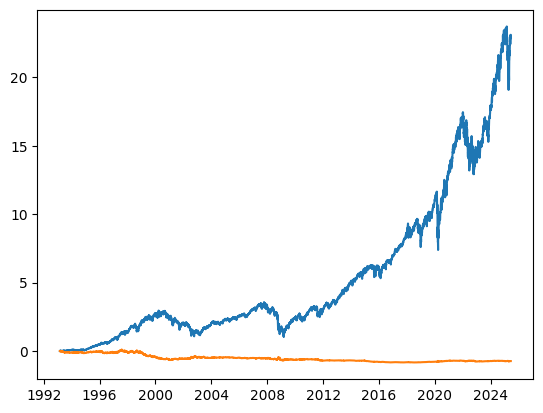

In [242]:
plt.plot(df['asset_cumulative'])



plt.plot(df['strategy_cumulative'])

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,MovingAvg,Strategy,asset_cumulative,strategy_cumulative
Date,,,,,,,,,
1993-02-26,24.713383,24.730774,24.591642,24.730774,66200,24.639476,NaN,NaN,NaN
1993-03-01,24.643816,24.800340,24.609033,24.800340,66500,24.649040,1.0,-0.002815,-0.002815
1993-03-02,25.009037,25.009037,24.626423,24.661206,182400,24.668170,-1.0,0.011963,-0.017593
1993-03-03,25.113407,25.130799,25.009058,25.043841,280100,24.689911,1.0,0.016187,-0.013493
1993-03-04,24.974270,25.148185,24.974270,25.148185,89500,24.691650,1.0,0.010557,-0.018959
...,...,...,...,...,...,...,...,...,...
2025-05-30,589.390015,591.130005,583.239990,588.929993,90601200,580.639005,1.0,22.849022,-0.733771
2025-06-02,592.710022,592.789978,585.059998,587.760010,61630500,581.936505,1.0,22.983363,-0.732271
2025-06-03,596.090027,597.080017,591.849976,592.340027,63606200,583.565506,1.0,23.120131,-0.730744


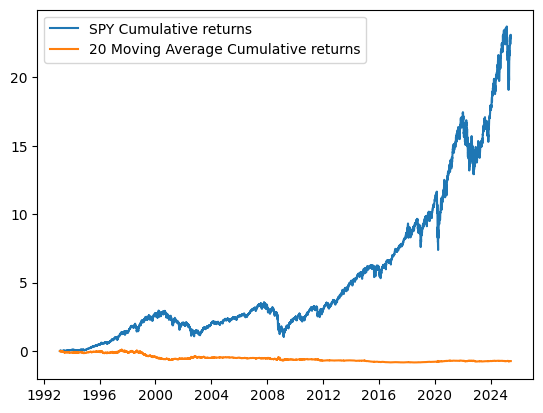

In [243]:
TICKER = 'SPY'
WINDOW = 20

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)

    df['MovingAvg'] = df['Close'].rolling(WINDOW).mean()
    return df.dropna()


def add_strategy(df):
    df.columns = df.columns.get_level_values(0)
    df['Strategy'] = np.where(df['Close'] > df['MovingAvg'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df):
    df['asset_cumulative'] = np.cumprod(1 + df['Close'].pct_change()) -1
    df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy']) -1
    
    #plot the returns
    plt.plot(df['asset_cumulative'])
    plt.plot(df['strategy_cumulative'])
    plt.legend([f'{TICKER} Cumulative returns', f'{WINDOW} Moving Average Cumulative returns'])
    return df

def main():
    df = get_data()
    df = add_strategy(df)
    df = test_strategy(df)
    return df

main()

In [244]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
TICKER = 'SPY'
WINDOW = 20
FAST = 10
SLOW = 27
LOOKBACK = 1000000

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)

    return df

def add_moving_averages(df, fast, slow):
    df[f'{FAST}_ma'] = df['Close'].rolling(FAST).mean()
    df[f'{SLOW}_ma'] = df['Close'].rolling(SLOW).mean()

    subset = df.iloc[-LOOKBACK:, :]

    plt.plot(subset['Close'])
    plt.plot(subset[f'{FAST}_ma'])
    plt.plot(subset[f'{SLOW}_ma'])

    plt.legend(['Close', f'{FAST}_ma', f'{SLOW}_ma'])
    plt.title('Moving Average Crossovers')
    return df.dropna()

df = get_data()
df = add_moving_averages(df, FAST, SLOW)

df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,10_ma,27_ma
Date,,,,,,,
1993-03-09,25.374275,25.426450,25.322101,25.409058,169300,24.949915,24.750751
1993-03-10,25.426439,25.426439,25.269915,25.374265,194400,25.029916,24.786822
1993-03-11,25.356880,25.513404,25.322097,25.443838,70900,25.097743,24.813876
1993-03-12,25.095989,25.165555,24.939465,25.148164,643600,25.136002,24.829334
1993-03-15,25.217745,25.217745,25.078612,25.078612,310800,25.193395,24.839640
...,...,...,...,...,...,...,...
2025-05-30,589.390015,591.130005,583.239990,588.929993,90601200,588.527997,572.730001
2025-06-02,592.710022,592.789978,585.059998,587.760010,61630500,588.378998,574.851854
2025-06-03,596.090027,597.080017,591.849976,592.340027,63606200,588.503003,576.681485


Text(0.5, 1.0, 'Moving Average Crossovers')

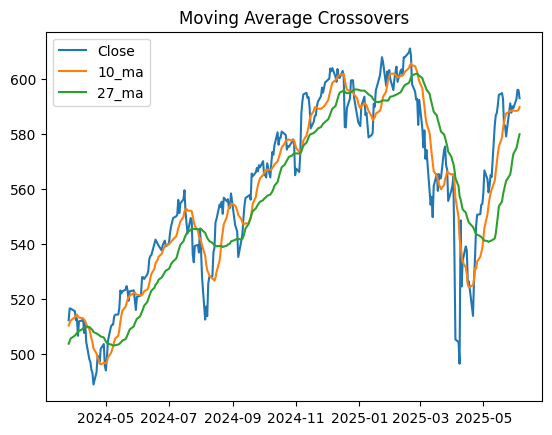

In [246]:
#there are two parts iloc - rows, columns - separated by a comma
subsection = df.iloc[-300:,:]

plt.plot(subsection['Close'])
plt.plot(subsection[f'{FAST}_ma'])
plt.plot(subsection[f'{SLOW}_ma'])

plt.legend(['Close', f'{FAST}_ma', f'{SLOW}_ma'])
plt.title('Moving Average Crossovers')